In [14]:
import pandas as pd
import numpy as np
%matplotlib inline

#load data
data_1 = pd.read_csv('..//data//themes_0_26_US.csv')
data_2 = pd.read_csv('..//data//themes_27_30_US.csv')

#clean price field
data_US = pd.concat((data_1,data_2), axis = 0).drop_duplicates().reset_index(drop = True)
data_US['list_price'] = data_US['list_price'].str.replace('$','').astype(float)

## to do

* fill mising data 
* handle age buckets
* digitize difficulty
* create new features
    * contains trademark
    * contains electronics

In [124]:
data_US

,ages,list_price,num_reviews,piece_count,prod_desc,prod_id,review_difficulty,set_name,star_rating
0,6-12,29.99,2.0,277.0,Catapult into action and take back the eggs fr...,75823.0,Average,Bird Island Egg Heist,4.5
1,6-12,19.99,2.0,168.0,Launch a flying attack and rescue the eggs fro...,75822.0,Easy,Piggy Plane Attack,5.0
2,6-12,12.99,11.0,74.0,Chase the piggy with lightning-fast Chuck and ...,75821.0,Easy,Piggy Car Escape,4.3
3,12+,99.99,23.0,1032.0,Explore the architecture of the United States ...,21030.0,Average,United States Capitol Building,4.6
4,12+,79.99,14.0,744.0,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Challenging,Solomon R. Guggenheim Museum®,4.6
5,12+,59.99,7.0,597.0,Celebrate Shanghai with this LEGO® Architectur...,21039.0,Average,Shanghai,4.9
6,12+,59.99,37.0,598.0,Celebrate New York City with this LEGO® Archit...,21028.0,Average,New York City,4.2
7,12+,49.99,24.0,780.0,Recreate Buckingham Palace with LEGO® Architec...,21029.0,Average,Buckingham Palace,4.7
8,12+,39.99,23.0,468.0,Celebrate London with this LEGO® Architecture ...,21034.0,Average,London,4.7
9,12+,39.99,11.0,444.0,Celebrate Chicago with this LEGO® Architecture...,21033.0,Average,Chicago,4.8


In [111]:
#select columns to use for model
data_use = data_US.loc[:,['list_price','piece_count','ages']]

data_use = data_use[data_use['ages'].notnull()]

In [112]:
#fill null values
data_use['piece_count'] = data_use['piece_count'].fillna(data_use['piece_count'].mean())

#use this when we have more info
#data_use['piece_count'] = data_use.groupby("ages").transform(lambda x: x.fillna(x.mean()))['piece_count']

#handle ages
data_use[['age_bot','age_top']] = data_use['ages'].str.split(r'-|\+', expand = True)
data_use['age_top'] = data_use['age_top'].replace('',22)
data_use['age_top'] = data_use['age_top'].fillna(22).astype(int)
data_use['age_top'] = np.where(data_use['age_top'] >22, 22, data_use['age_top'])
data_use['age_bot'] = data_use['age_bot'].fillna(2).astype(int)

#calc features from age
data_use['age_range'] = data_use['age_top'] - data_use['age_bot']
data_use['age_mean'] = (data_use['age_top'] + data_use['age_bot']) / 2

data_use

,list_price,piece_count,ages,age_bot,age_top,age_range,age_mean
0,29.99,277.000000,6-12,6,12,6,9.0
1,19.99,168.000000,6-12,6,12,6,9.0
2,12.99,74.000000,6-12,6,12,6,9.0
3,99.99,1032.000000,12+,12,22,10,17.0
4,79.99,744.000000,12+,12,22,10,17.0
5,59.99,597.000000,12+,12,22,10,17.0
6,59.99,598.000000,12+,12,22,10,17.0
7,49.99,780.000000,12+,12,22,10,17.0
8,39.99,468.000000,12+,12,22,10,17.0
9,39.99,444.000000,12+,12,22,10,17.0


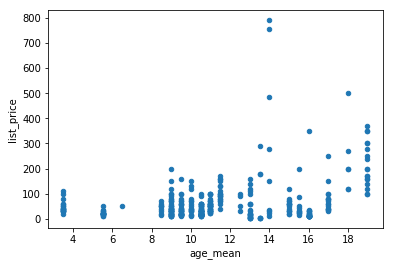

In [116]:
data_use.plot(kind = 'scatter', x = 'age_mean', y = 'list_price');

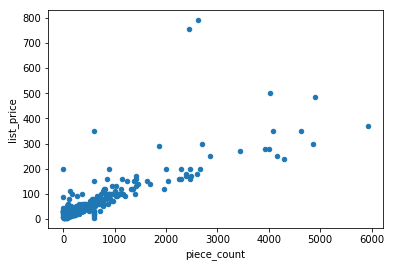

In [120]:
data_use.plot(kind = 'scatter', x = 'piece_count', y = 'list_price');

In [122]:
data_use['age_mean^2'] = data_use['age_mean'] ** 2

In [123]:
import statsmodels.api as sm

target = 'list_price'

features = [
    
    'piece_count',
    'age_mean',
    'age_mean^2'
    
]

model = sm.OLS(data_use[target], data_use[features]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 20 Apr 2018   Prob (F-statistic):          1.64e-128
Time:                        15:58:44   Log-Likelihood:                -2093.9
No. Observations:                 393   AIC:                             4194.
Df Residuals:                     390   BIC:                             4206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
piece_count     0.0867      0.004     24.105      0.000       0.080       0.094
age_mean        3.9358      0.865      4.549      0.000       2.235       5.637
age_mean^2     -0.2295      0.066     -3.460      0.001      -0.360      -0.099
==============================================================================
Omnibus:                      558.435   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89229.278
Skew:                           7.205   Prob(JB):                         0.00
Kurtosis:                      75.398   Cond. No.                         357.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""